In [1]:
import pandas as pd

# Assignment 1 - Store Inventory 

For this assignment you want to build an inventory, such as you might find at a store. There are two key objects that you'll need here (though you may do more if you want/need):

<b>Products:</b>
<ul>
<li> Each item should be a product object, containing: </li>
    <ul>
    <li> A unique id number </li>
    <li> A product name </li>
    <li> A category </li>
    <li> A subcategory </li>
    <li> The URL of an image</li>
    <li> The URL of the product </li>
    <li> A rating (0-5) </li>
    <li> The number of reviews that constituted the rating </li>
    <li> A regular price </li>
    <li> A sale price </li>
    </ul>
<li> Products should have several methods, not limited to, but including: </li>
    <ul>
    <li> A __str__ function that prints the product in a nice format, displaying: </li>
        <ul>
        <li> The product name </li>
        <li> The image </li>
        <li> The product rating </li>
        <li> The product price </li>
        </ul>
    <li> A method to set the discount price - that can accept either a price or a percentage discount as an argument and calculate a new discount price from the actual price </li>
    <li> A method to add a rating to a product </li>
    </ul>
</ul>

<b>Inventory:</b>
<ul>
<li> Each inventory object should keep track of all the products along with a stock level. </li>
<li> The inventory should include methods such as:</li>
    <ul>
    <li> A method to add a new product to the inventory </li>
    <li> A method to remove a product from the inventory </li>
    <li> A method to print all the products in a category in a nice format </li>
    <li> A method to use the + sign to add two inventories together </li>
    <li> A method to get the Top X highest rated products </li>
    <li> A method to change the stock levels for any item in that inventory </li>
    </ul>
</ul>

## Marks and Key Points

There are marks allocated for the following:
<ul>
<li> <b>20%</b> - Error checking - use try/except blocks to catch errors. Specifically check the image loading (some URLs may not work) and the price cleanup (the data may be unclean). </li>
<li> <b>30%</b> - Use of classes and methods - you should have at least the classes constructed with relevant methods. </li>
<li> <b>30%</b> - Output - I will test your code with data that is different, but in the exact same format as the sample. Everything you create should be generic enough to handle any data in the same format. </li>
    <ul>
    <li> At the bottom of your code, please make a section that shows that it works. Load two data files into two inventory objects, display some contents from each, add rating, show the highest rated objects, change a stock level, and add the two inventories together. </li>
    <li> In here, please be clear in what you are showing. Use titled markup blocks to illustrate. You're basically showing, "here's it working". </li>
    </ul>
<li> <b>20%</b> - Code comments and formatting - you should have comments throughout your code explaining what you are doing. Use markup blocks to add a description. </li>
</ul>

### Tips and Hints

<b>Note:</b> I will update the README file in the original repository if I need to add any notes and clarifications. That's likely, as this is obviously open-ended. In general, if you need to make reasonable assumptions, please do so. 

<ul>
<li> The "Show Images" block below shows an example of loading an image from a URL. </li>
<li> Check the parts of error checking other than try/except, they may be useful, depending on what you choose. </li>
<li> You can use the CSV files in the repsoitory for testing, each should work. </li>
</ul>

## Classes

In [2]:
class myProduct():
    
    def __init__(self, name, category, subcat, imageURL, prodURL, rating, numRate, discPrice, price) -> None:
        self.name = name
        self.category = category
        self.subcat = subcat
        self.imageURL = imageURL
        self.prodURL = prodURL
        self.rating = rating
        #self.rating = float(rating)
        self.numRate = numRate
        self.discPrice = discPrice
        self.price = price
    
    def __str__(self) -> str:
        return f"{self.name} is a {self.category} product with a rating of {self.rating} and {self.numRate} reviews. It is currently ${self.price}."
    
    def display(self):
        im = Image.open(requests.get(self.imageURL, stream=True).raw)
        print("\n"+self.name)
        display(im)
        print(f"Rating: {float(self.rating):.1f} ({self.numRate} reviews)")
        print(f"Price: ${float(self.price)}")
        print(f"Discounted Price: ${float(self.discPrice)}")
        print("\n")
        
    def getRating(self) -> float:
        return self.rating
    def get_imageURL(self) -> str:
        return self.imageURL
    def setDiscountPercent(self, discount) -> float:
        self.discPrice = self.price*(1-discount)
        return self.discPrice
    
    def setDiscPrice(self, newPrice) -> float:
        self.discPrice = newPrice
        return self.discPrice
    
    def addRating(self, rating, numberRate=1) -> float:
        self.rating = (self.rating*self.numRate + rating*numberRate)/(self.numRate+numberRate)
        self.numRate += numberRate
        return self.rating
    
    def __lt__(self, other):
        return float(self.rating) < float(other.rating)

In [3]:
import re

class myInventory():
    
    def __init__(self) -> None:
        self.products = {}
        self.currentIndex = 0
    
    def read_file(self, path, stock=10) -> int:
        df = pd.read_csv(path)
        df["discount_price"] = self.remove_non_numberics(df["discount_price"])
        df["actual_price"] = self.remove_non_numberics(df["actual_price"])
        
        for ind, row in df.iterrows():
            prod = myProduct(
                row["name"],
                row["main_category"],
                row["sub_category"],
                row["image"],
                row["link"],
                row["ratings"],
                row["no_of_ratings"],
                row["discount_price"],
                row["actual_price"]
            )
            self.products[row["name"]] = (prod, stock)
        return len(self.products)
    
    def remove_non_numberics(self, s):
        return float(re.sub('[^0-9]+', '', str(s)))
    
    def get_products(self):
        return self.products
    def resestCounter(self, val=0):
        self.currentIndex = val
    def adjustStock(self, name, amount):
        self.products[name][1] += amount
    def __add__(self, other):
        for k, v in other.get_products().items():
            self.products[k] = v
        return self
            
    def printTopRated(self, num=4):
        #print(self.products.items())
        sorted = []
        items = self.products.items()
        for k, v in items:
            rate = v[0].getRating()
            for n in sorted:
                if rate > n[0].getRating():
                    sorted.insert(sorted.index(n), v)
                    break
        for i in range(num):
            print(sorted)
            sorted[i][0].display()
        
    def printNext(self, num=4):
        start = self.currentIndex
        self.currentIndex += num
        #print(self.products)
        tmpItems = list(self.products.items())[start:self.currentIndex]
        for i, (k,v) in enumerate(tmpItems):
            #print(type(item))
            #print(i)
            #print(item.value)
            print(v[0].get_imageURL())
            try:
                v[0].display()
            except:
                pass
            if i == self.currentIndex:
                break

    def printNext2(self, num=4):
        start = self.currentIndex
        self.currentIndex += num
        #print(self.products)
        for i, (k,v) in enumerate(self.products.items(), start):
            #print(type(item))
            print(i)
            #print(item.value)
            v.display()
            if i == self.currentIndex:
                break

#### Show Images


In [4]:
df = pd.read_csv("Strength Training.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917,₹965.08,"₹4,999"
1,Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprs...,https://www.amazon.in/Generic-Vinyl-Coated-Iro...,4.4,367,₹389,"₹6,450"
2,LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbF...,https://www.amazon.in/LALA-LIFE-Gripper-Streng...,4.5,381,₹489,"₹1,199"
3,Aurion Genuine Leather Pro Weight Lifting Belt...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/813g2hRYuo...,https://www.amazon.in/Genuine-Comfortable-Adju...,4.4,446,₹799,₹899
4,SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/61VcW8otph...,https://www.amazon.in/Dumbbells-Equipment-Fitn...,3.5,52,₹82.31,₹200


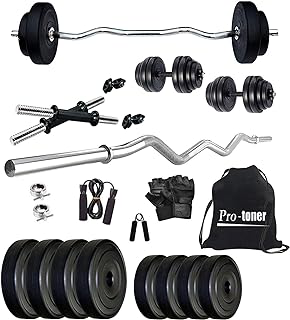

In [5]:
# This code will display an image given a URL
from PIL import Image
import requests

url = df["image"][0]

im = Image.open(requests.get(url, stream=True).raw)
display(im)

## Testing

This stuff should work...

You should also add more testing, that can be built into your final part of code. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1104 non-null   object
 1   main_category   1104 non-null   object
 2   sub_category    1104 non-null   object
 3   image           1104 non-null   object
 4   link            1104 non-null   object
 5   ratings         897 non-null    object
 6   no_of_ratings   897 non-null    object
 7   discount_price  1046 non-null   object
 8   actual_price    1088 non-null   object
dtypes: object(9)
memory usage: 77.8+ KB


In [7]:
# Create an inventory from the supplied file. 
inv = myInventory()
inv.read_file("Strength Training.csv")

1097

https://m.media-amazon.com/images/I/71K-gcsnOYL._AC_UL320_.jpg

Protoner 16Kg PVC Combo Home Gym Package


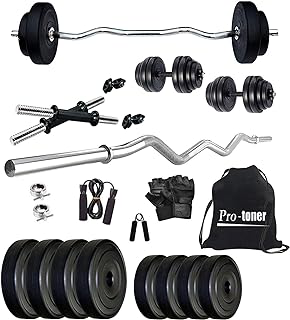

Rating: 3.6 (917 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/71pcrSXprsL._AC_UL320_.jpg

Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights for Strength Training - Weight Loss, Workout Bench, Gym...


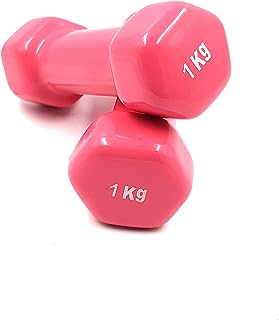

Rating: 4.4 (367 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/41oTg0XNbFL._AC_UL320_.jpg

LAFILLETTE 150 lbs Metal Hand Gripper Forearm Wrist Heavy Strength Exercise Hand Grip/Fitness Grip (Black)


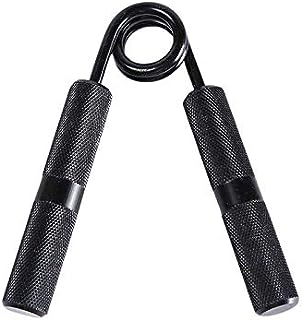

Rating: 4.5 (381 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/813g2hRYuoL._AC_UL320_.jpg

Aurion Genuine Leather Pro Weight Lifting Belt, Durable Comfortable & Adjustable With Buckle, Stabilizing Lower Back Suppo...


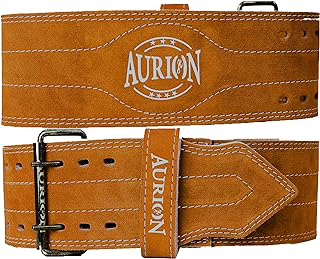

Rating: 4.4 (446 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62




In [8]:
inv.printNext()

In [9]:
#inv.printTopRated()

Test 2

https://m.media-amazon.com/images/I/61G5k3T0ffL._AC_UL320_.jpg

Electronic Spices 2.75 Inch 4ω (Ohm) 400w Max Power Dome Tweeter Speaker


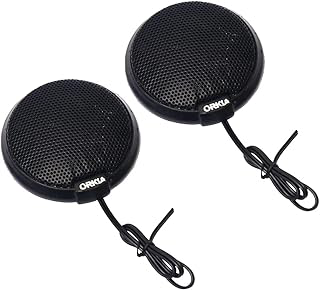

Rating: nan (nan reviews)
Price: $1.9919992105387347e+58
Discounted Price: $1.2912192358241482e+54


https://m.media-amazon.com/images/I/51NLOKwNsLS._AC_UL320_.jpg

ZQWINT Bluetooth Car Adapter, Mini USB Bluetooth 5.0 Transmitter Receiver Wireless 3.5mm Aux Jack Adapter Hands-Free Car K...


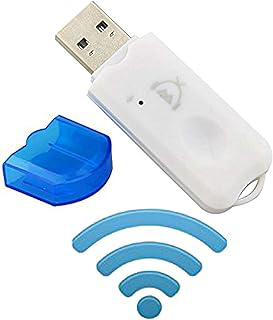

Rating: nan (nan reviews)
Price: $1.9919992105387347e+58
Discounted Price: $1.2912192358241482e+54


https://m.media-amazon.com/images/I/71St2ruv+NL._AC_UL320_.jpg

PROTECTRON 6.35X32mm GLASS FUSE/INVERTER FUSE - 1A (Pack of 10)


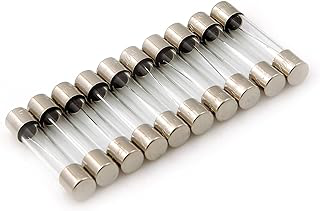

Rating: 3.8 (32 reviews)
Price: $1.9919992105387347e+58
Discounted Price: $1.2912192358241482e+54


https://m.media-amazon.com/images/I/31npb8UF2yL._AC_UL320_.jpg

Cave Maruti Suzuki Male-Female Stereo Coupler Harness For All Suzuki Cars.


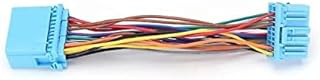

Rating: 4.1 (7 reviews)
Price: $1.9919992105387347e+58
Discounted Price: $1.2912192358241482e+54




In [10]:
inv2 = myInventory()
inv2.read_file("Car Electronics.csv")
inv2.printNext()

https://m.media-amazon.com/images/I/61VcW8otphL._AC_UL320_.jpg

SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2 Kg) Pack of 2 for Home Gym Equipment Fitness Barbell|Gym Exercise|Home Work...


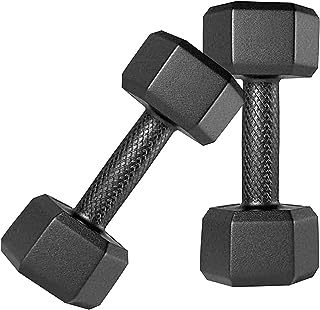

Rating: 3.5 (52 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/61JDnhgeIuL._AC_UL320_.jpg

Pull up Bar for Home, Sportneer Adjustable Length Hanging Rod for Height Increase No Screws Anti-skid Grip Hanging Bar for...


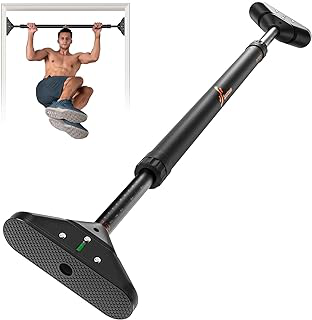

Rating: 4.4 (397 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/81uD8dr+YbL._AC_UL320_.jpg

Dr Trust AB Wheel (USA) Abdominal Exercise Ab Blaster Fitness Roller Wheel Equipment with Knee Mat for Men & Women (Black)


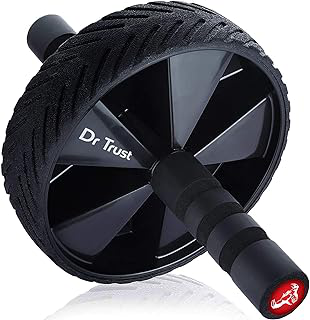

Rating: 4.4 (2,477 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62


https://m.media-amazon.com/images/I/71scShG3UlL._AC_UL320_.jpg

Lycan Wrist/Ankle Weights 4 kg (2 kg Each x 2 pc)


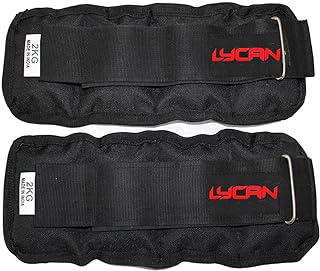

Rating: 4.0 (80 reviews)
Price: $4.999164502119939e+64
Discounted Price: $9.65081389248938e+62




In [11]:
new = inv + inv2
new.printNext()